# Example

The EdiHeadyTrack sample videos used here can be downloaded directly from the [Github](https://github.com/isDynamics/EdiHeadyTrack/tree/master/resources) or in the terminal using [wget](https://www.gnu.org/software/wget/).

Installing EdiHeadyTrack:

In [ ]:
!pip install EdiHeadyTrack

Importing the package (once installation is complete):

In [3]:
import EdiHeadyTrack as eht

Navigate to the directory from which video files will be accessed:

In [ ]:
import os
os.chdir('..')
print(os.getcwd())

Select a video in which camera calibration is performed and create a calibrated camera object:

In [5]:
calibration_video = eht.Video(filename='resources/calibration_example.mp4')
calibrated_camera = eht.Camera().calibrate(checkerboard=(9,6), video=calibration_video)

------------------------------------------------------------------------------------------------------------------------
Creating Calibrator object for video resources/calibration_example.mp4:                                         14:10:19
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------
Video data:
------------------------------------------------------------
Video resolution: 1920 x 1080 pixels
Length of video: 917 frames
Framerate: 60 fps
------------------------------------------------------------
Checkerboard created
Checkerboard dimensions: 9 x 6
Displaying video...
Number of frames used for calibration: 51
------------------------------------------------------------------------------------------------------------------------
Calibrator object complete!                                                                                     14:10:29
---

Create video object to perform tracking on, and perform head tracking using chosen face detector from 'facedetector' module:

In [8]:
tracking_video = eht.Video(filename='resources/header1.mp4')
mediapipe = eht.MediaPipe(video=tracking_video, camera=calibrated_camera)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


------------------------------------------------------------------------------------------------------------------------
Creating MediaPipe object for video resources/header1.mp4:                                                      14:11:21
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------
Video data:
------------------------------------------------------------
Video resolution: 720 x 1280 pixels
Length of video: 715 frames
Framerate: 240 fps
------------------------------------------------------------
Running MediaPipe Face Mesh on selected video...


 99%|█████████▉| 707/715 [00:37<00:00, 18.76it/s]


Face tracking complete...
Computing head pose from tracking data...
------------------------------------------------------------------------------------------------------------------------
MediaPipe object complete!                                                                                      14:11:59
------------------------------------------------------------------------------------------------------------------------


Create a filter to be applied to signals: 

In [9]:
filter = eht.Filter().low_pass_butterworth(fs=4000, lowcut=160, order=4)

Create a Head object and apply the above filter:

In [10]:
head = eht.Head(posedetector=mediapipe, id='MP').apply_filter(filter)

------------------------------------------------------------------------------------------------------------------------
Creating Head object for MediaPipe Face Detector with video resources/header1.mp4:                              14:12:28
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Head object complete!                                                                                           14:12:28
------------------------------------------------------------------------------------------------------------------------


Load data from a chosen IMU using a class from the imu module:

In [11]:
wax9 = eht.Wax9(filename='resources/example_imu.csv', time_offset=-59.335, id='WAX-9')

Create a list of key times for showing video frames, and create a comparison plot:

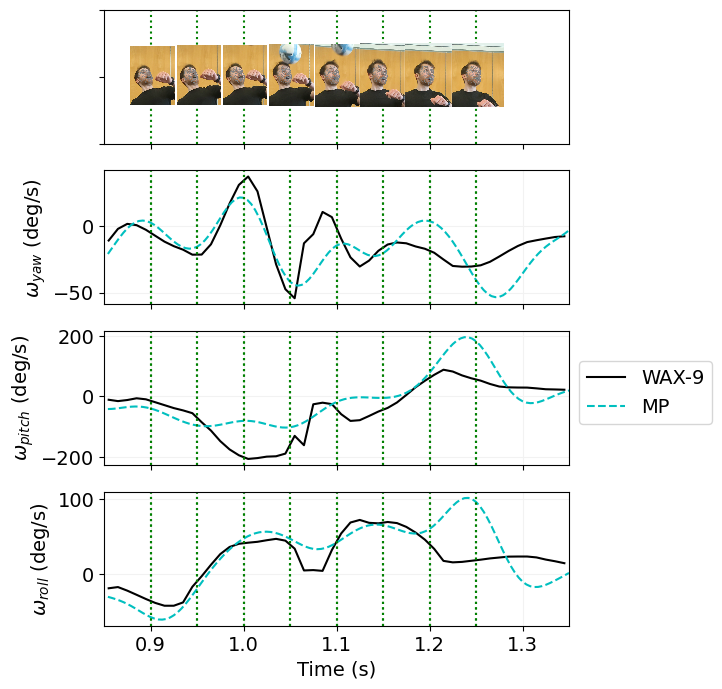

In [12]:
key_times = [0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25]
comparison_plot = eht.Plot(wax9, head).plot_property(property='velocity', 
                                                     xlim=(0.85, 1.35), 
                                                     ylim=(-220, 220), 
                                                     key_times=key_times,
                                                     show=True) 

Produce a table summarising the maximum values of each plot:

In [13]:
comparison_plot.summarise()

----------------------------------------------
WAX-9 plot summary
----------------------------------------------
yaw, velocity                            54.32
pitch, velocity                         206.99
roll, velocity                           72.52
----------------------------------------------
MP plot summary
----------------------------------------------
yaw, velocity                             53.5
pitch, velocity                         196.03
roll, velocity                          101.86
----------------------------------------------
